<a href="https://colab.research.google.com/github/zjkang/machine-learning-coding/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer to [k-means](https://github.com/zjkang/Machine-Learning-Interviews/blob/main/src/MLC/notebooks/k_means.ipynb), and the impementation should be straightforward.

The procedures are as follows:

Initialize:
- K: number of clusters
- Data: the input dataset
- Randomly select K initial centroids

Repeat:
- Assign each data point to the nearest centroid (based on Euclidean distance)
- Calculate the mean of each cluster to update its centroid
- Check if the centroids have converged (i.e., they no longer change)

Until:
- The centroids have converged
- The maximum number of iterations has been reached

Output:
- The final K clusters and their corresponding centroids

In [18]:
import numpy as np

class KMeans:
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations

    def fit(self, X):
        # Initialize centroids randomly
        random_index = np.random.choice(range(len(X)), self.k, replace=False)
        print(random_index)
        self.centroids = X[random_index]

        for i in range(self.max_iterations):
            # Assign each data point to the nearest centroid
            cluster_assignments = []
            for j in range(len(X)):
                distances = np.linalg.norm(X[j] - self.centroids, axis=1)
                cluster_assignments.append(np.argmin(distances))

            # Update centroids
            for k in range(self.k):
                cluster_data_points = X[np.where(np.array(cluster_assignments) == k)]
                if len(cluster_data_points) > 0:
                    self.centroids[k] = np.mean(cluster_data_points, axis=0)

            # Check for convergence
            if i > 0 and np.array_equal(self.centroids, previous_centroids):
                print(previous_centroids)
                print(self.centroids)
                print(f'Convergence after {i} iterations')
                break

            # Update previous centroids
            previous_centroids = np.copy(self.centroids)

        # Store the final cluster assignments
        self.cluster_assignments = cluster_assignments

    def predict(self, X):
        # Assign each data point to the nearest centroid
        cluster_assignments = []
        for j in range(len(X)):
            distances = np.linalg.norm(X[j] - self.centroids, axis=1)
            cluster_assignments.append(np.argmin(distances))

        return cluster_assignments

In [19]:
x1 = np.random.randn(100,2) + 5
x2 = np.random.randn(10,2) - 5
X = np.concatenate([x1,x2], axis=0)

# Initialize the KMeans object with k=3
kmeans = KMeans(k=2)

# Fit the k-means model to the dataset
kmeans.fit(X)

# Get the cluster assignments for the input dataset
cluster_assignments = kmeans.predict(X)

# Print the cluster assignments
print(cluster_assignments)

# Print the learned centroids
print(kmeans.centroids)

[106 104]
[[ 4.93701614  5.08834532]
 [-4.66077738 -5.15977703]]
[[ 4.93701614  5.08834532]
 [-4.66077738 -5.15977703]]
Convergence after 2 iterations
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[ 4.93701614  5.08834532]
 [-4.66077738 -5.15977703]]


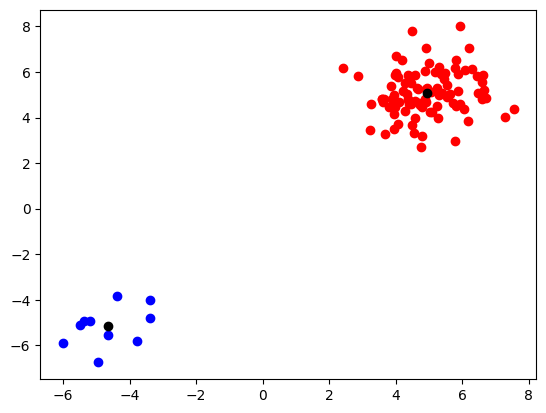

In [20]:
from matplotlib import pyplot as plt
# Plot the data points with different colors based on their cluster assignments
colors = ['r', 'b']
for i in range(kmeans.k):
    plt.scatter(X[np.where(np.array(cluster_assignments) == i)][:,0],
                X[np.where(np.array(cluster_assignments) == i)][:,1],
                color=colors[i])

# Plot the centroids as black circles
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], color='black', marker='o')

# Show the plot
plt.show()